# Which movie does reddit think will win best picture?

This project leverages sentiment analysis of Reddit comments to predict potential Best Picture nominees. By collecting user comments from official discussion threads of various movies on the /r/movies subreddit, the program categorizes the sentiments expressed in the comments as positive, negative, or neutral. Sentiment scores are calculated for each movie based on the comments’ emotional tone, providing insights into how well-received the film is by the Reddit community.

The sentiment analysis is performed using TextBlob, and the results are visualized through bar charts and minimalist donut charts to showcase the distribution of sentiments and the overall sentiment score. The project’s goal is to analyze the public’s reaction to movies and hypothesize which films may have the most favorable reception, possibly correlating with future award nominations, such as the Academy Award for Best Picture.

The analysis can be extended to include additional movies and threads, providing a dynamic and data-driven approach to movie discussions online.

I went through the r/movies submit and grabbed the offical discusion for each film (the first 1000 comments). I then used praw to pull down and loop through all of the comments. and used Textblob to score each comment which I used to create a sentiment score. I really wanted to use r/truefilm for this analysis, but I couldn't find 'Official Discussion" threads on that sub, so I'm stuck with movies. I also realize this isn't very sceintific but it's more just for fun.

TLDR: r/movies really liked I'm Still Here

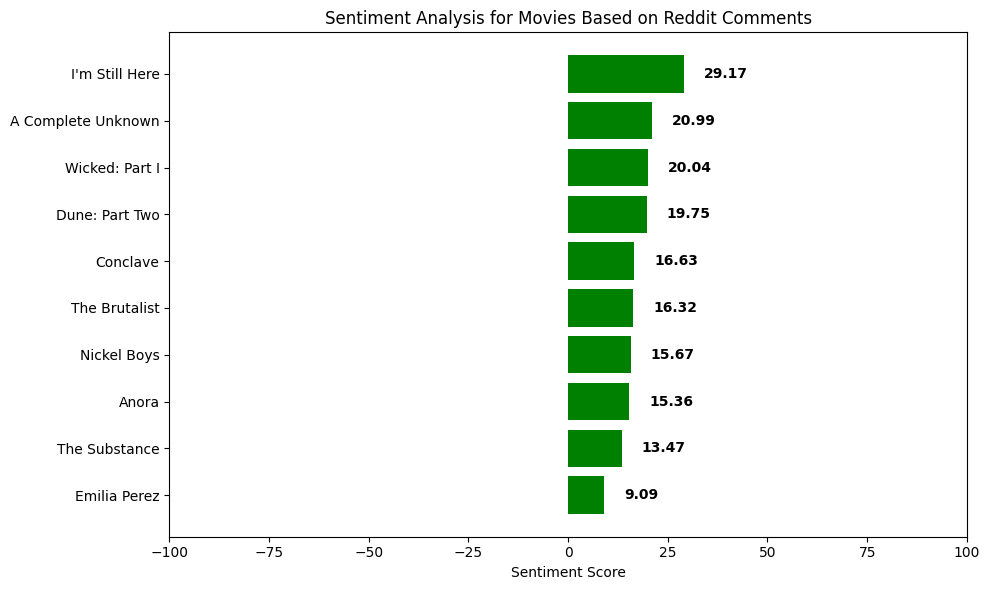

<Figure size 640x480 with 0 Axes>

In [12]:
import praw
import matplotlib.pyplot as plt
from textblob import TextBlob
import time
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

client_id = os.getenv('CLIENT_ID')
api_key = os.getenv('API_KEY')
user_agent = os.getenv('USER_AGENT')

# Initialize Reddit API client
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent=user_agent)

# Define the analyze_sentiment function
def analyze_sentiment(text):
    # Simple sentiment analysis using TextBlob
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a float between -1 and 1

# The list of movie names and URLs
urls_and_movies = [
    ("Anora", "https://www.reddit.com/r/movies/comments/1ggv4yg/official_discussion_anora_spoilers/"),
    ("The Brutalist", "https://www.reddit.com/r/movies/comments/1i37yra/official_discussion_the_brutalist_spoilers/"),
    ("A Complete Unknown", "https://www.reddit.com/r/movies/comments/1hlsi27/official_discussion_a_complete_unknown_spoilers/"),
    ("Conclave", "https://www.reddit.com/r/movies/comments/1gbjlm7/official_discussion_conclave_spoilers/"),
    ("Dune: Part Two", "https://www.reddit.com/r/movies/comments/1b3jo9s/official_discussion_dune_part_two_spoilers/"),
    ("Emilia Perez", "https://www.reddit.com/r/movies/comments/1grn0lz/official_discussion_emilia_p%C3%A9rez_spoilers/"),
    ("I'm Still Here", "https://www.reddit.com/r/movies/comments/1gpzxb2/im_still_here_official_trailer_2025/"),
    ("Nickel Boys", "https://www.reddit.com/r/movies/comments/1i8m8iz/official_discussion_nickel_boys_spoilers/"),
    ("The Substance", "https://www.reddit.com/r/movies/comments/1fl1bpl/official_discussion_the_substance_spoilers/"),
    ("Wicked: Part I", "https://www.reddit.com/r/movies/comments/1gwxxy1/official_discussion_wicked_part_i_spoilers/")
]

movie_scores = []

# Loop through all of the comments and assign each a score
for movie, url in urls_and_movies:
    try:
        # Fetch the Reddit post
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=5)  # Include deeper threads
        comments = submission.comments.list()  # Fetch all comments

        # Compute sentiment scores for all comments
        sentiment_scores = [analyze_sentiment(comment.body) for comment in comments if comment.body]

        # Exclude neutral comments (if needed)
        valid_sentiments = [score for score in sentiment_scores if score != 0]

        # Compute final sentiment score
        if valid_sentiments:
            score = (sum(valid_sentiments) / len(valid_sentiments)) * 100
        else:
            score = 0  # Default score if no valid sentiments found

        movie_scores.append((movie, score))

    except praw.exceptions.APIException as e:
        if e.error_type == 'RATELIMIT':
            print(f'Rate limit exceeded. Sleeping for {e.sleep_time} seconds.')
            time.sleep(e.sleep_time)
        else:
            raise
    except Exception as e:
        print(f'An error occurred: {e}')
        time.sleep(60)  # Sleep for 60 seconds before retrying

# Export the movie scores to a CSV file
with open('movie_scores.csv', 'w') as file:
    file.write('Movie,Score\n')
    for movie, score in movie_scores:
        file.write(f'{movie},{score}\n')

# Sort the movie scores from highest to lowest
movie_scores.sort(key=lambda x: x[1], reverse=True)

# Create a single bar chart showing the sentiment score for each movie
movies = [movie for movie, score in movie_scores]
scores = [score for movie, score in movie_scores]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(movies, scores, color=['green' if score >= 0 else 'red' for score in scores])

# Add labels and title
plt.xlabel('Sentiment Score')
plt.title('Sentiment Analysis for Movies Based on Reddit Comments')
plt.xlim(-100, 100)
plt.gca().invert_yaxis()  # Reverse the y-axis to show highest scores at the top

# Add data labels on each bar
for index, score in enumerate(scores):
    plt.text(score + (5 if score > 0 else -5), index, f'{score:.2f}', va='center', ha='left' if score > 0 else 'right', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Save the graph as an image file
plt.savefig("sentiment_analysis_graph.png", format='png')

## They all have positive sentiment?

No surprises that all of the best picture nominees all seemed to be generally well received on Reddit.

## How does I'm Still Here sentiment compare the the sentiment of previous best picture winners?

For this I just grabbed all of the past best picture nominees for the past 5 years and ran the same analysis.

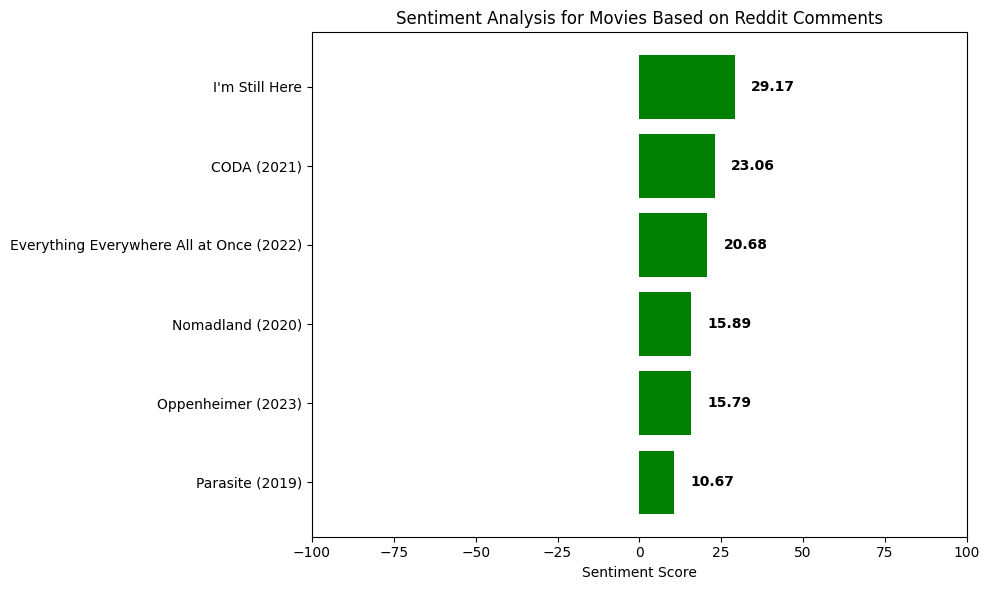

<Figure size 640x480 with 0 Axes>

In [15]:
import praw
import matplotlib.pyplot as plt
from textblob import TextBlob
import time
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

client_id = os.getenv('CLIENT_ID')
api_key = os.getenv('API_KEY')
user_agent = os.getenv('USER_AGENT')

# Initialize Reddit API client
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent=user_agent)

# Define the analyze_sentiment function
def analyze_sentiment(text):
    # Simple sentiment analysis using TextBlob
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a float between -1 and 1

# The list of movie names and URLs
urls_and_movies = [
    ("Oppenheimer (2023)", "https://www.reddit.com/r/movies/comments/155ag1m/official_discussion_oppenheimer_spoilers/"),
    ("Everything Everywhere All at Once (2022)", "https://www.reddit.com/r/movies/comments/tysxuy/official_discussion_everything_everywhere_all_at/"),
    ("CODA (2021)", "https://www.reddit.com/r/movies/comments/p3ztri/official_discussion_coda_spoilers/"),
    ("Nomadland (2020)", "https://www.reddit.com/r/movies/comments/lnwuxa/official_discussion_nomadland_spoilers/"),
    ("Parasite (2019)", "https://www.reddit.com/r/movies/comments/dps3xy/official_discussion_parasite_spoilers/"),
    ("I'm Still Here", "https://www.reddit.com/r/movies/comments/1gpzxb2/im_still_here_official_trailer_2025/")
]

movie_scores = []

# Loop through all of the comments and assign each a score
for movie, url in urls_and_movies:
    try:
        # Fetch the Reddit post
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=5)  # Include deeper threads
        comments = submission.comments.list()  # Fetch all comments

        # Compute sentiment scores for all comments
        sentiment_scores = [analyze_sentiment(comment.body) for comment in comments if comment.body]

        # Exclude neutral comments (if needed)
        valid_sentiments = [score for score in sentiment_scores if score != 0]

        # Compute final sentiment score
        if valid_sentiments:
            score = (sum(valid_sentiments) / len(valid_sentiments)) * 100
        else:
            score = 0  # Default score if no valid sentiments found

        movie_scores.append((movie, score))

    except praw.exceptions.APIException as e:
        if e.error_type == 'RATELIMIT':
            print(f'Rate limit exceeded. Sleeping for {e.sleep_time} seconds.')
            time.sleep(e.sleep_time)
        else:
            raise
    except Exception as e:
        print(f'An error occurred: {e}')
        time.sleep(60)  # Sleep for 60 seconds before retrying

# Export the movie scores to a CSV file
with open('movie_scores.csv', 'w') as file:
    file.write('Movie,Score\n')
    for movie, score in movie_scores:
        file.write(f'{movie},{score}\n')

# Sort the movie scores from highest to lowest
movie_scores.sort(key=lambda x: x[1], reverse=True)

# Create a single bar chart showing the sentiment score for each movie
movies = [movie for movie, score in movie_scores]
scores = [score for movie, score in movie_scores]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(movies, scores, color=['green' if score >= 0 else 'red' for score in scores])

# Add labels and title
plt.xlabel('Sentiment Score')
plt.title('Sentiment Analysis for Movies Based on Reddit Comments')
plt.xlim(-100, 100)
plt.gca().invert_yaxis()  # Reverse the y-axis to show highest scores at the top

# Add data labels on each bar
for index, score in enumerate(scores):
    plt.text(score + (5 if score > 0 else -5), index, f'{score:.2f}', va='center', ha='left' if score > 0 else 'right', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Save the graph as an image file
plt.savefig("sentiment_analysis_graph.png", format='png')

## Conclusion

It looks like I'm still here is beloved by Reddit, but in my heart or hearts I really think Anora is going to get it. What does Reddit know anyway?